In [1]:
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
train_Y = train["label"]
train_X = train.drop(columns=["label", ])

In [7]:
train_X.shape

(42000, 784)

In [8]:
train_X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [9]:
# No null values or missing values in the data

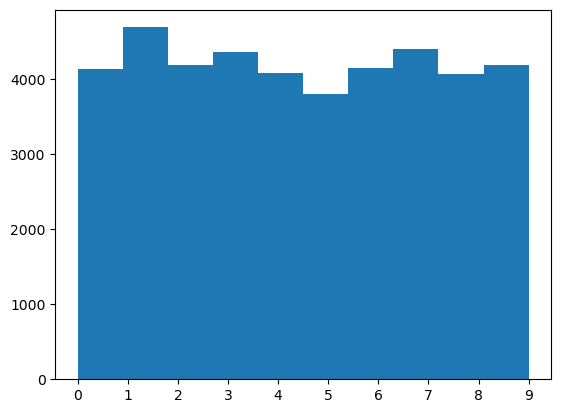

In [10]:
plt.hist(train["label"])
plt.xticks(range(10))
plt.show()

In [11]:
# there are around 4000 of each digit 
# Split the train_X into two parts 41000 for training data
# And 1000 for testing

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(train_X[:41000], train_Y[:41000])

KNeighborsClassifier(n_neighbors=10)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

def cal_acc(model):
    y_pred = model.predict(train_X[41000:])

    print(confusion_matrix(y_pred, train_Y[41000: ]))
    print(accuracy_score(y_pred, train_Y[41000: ]))
    

In [86]:
cal_acc(knn)

[[ 92   0   2   1   0   1   1   0   0   0]
 [  0 127   2   0   2   0   0   1   4   0]
 [  0   0  89   0   0   0   0   1   0   0]
 [  0   0   0  91   0   1   0   0   0   1]
 [  0   0   0   0 108   0   0   1   0   2]
 [  0   0   0   0   0  80   0   0   1   0]
 [  0   0   0   0   1   1 102   0   0   0]
 [  0   0   4   1   0   0   0  98   0   0]
 [  0   0   0   1   0   1   0   0  82   0]
 [  0   0   0   1   0   1   0   0   1  98]]
0.967


c:\Users\reddy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [95]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.083)

svm.fit(train_X[:41000], train_Y[:41000])

SVC(C=1.083)

In [96]:
cal_acc(svm)

[[ 90   0   0   1   0   1   1   0   0   0]
 [  0 126   0   0   1   1   0   0   2   0]
 [  0   0  96   0   0   0   0   1   0   0]
 [  0   0   0  92   0   0   0   0   0   1]
 [  0   0   0   0 106   0   0   1   0   2]
 [  0   0   0   0   0  80   0   0   1   0]
 [  1   0   0   0   1   0 102   0   0   0]
 [  0   0   0   1   0   0   0  98   0   2]
 [  1   0   1   0   1   2   0   0  85   0]
 [  0   1   0   1   2   1   0   1   0  96]]
0.971


In [5]:
def predict_model(model):
    test = pd.read_csv("test.csv")
    pred = model.predict(test)

    return pred

In [6]:
pred = predict_model(svm)

NameError: name 'svm' is not defined

In [7]:
def create_test_res(pred) :
    test_res = pd.DataFrame({"ImageId": np.array(range(1, len(pred) + 1)), 
    "Label": pred})

    test_res.to_csv("test_res.csv", index=None)

In [100]:
create_test_res(pred)

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(train_X[:41000], train_Y[:41000], epochs=5)

Epoch 1/5


c:\Users\reddy\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1282/1282 [==============================] - 3s 2ms/step - loss: 3.3945 - accuracy: 0.7537
Epoch 2/5
1282/1282 [==============================] - 2s 2ms/step - loss: 0.6461 - accuracy: 0.8297
Epoch 3/5
1282/1282 [==============================] - 2s 2ms/step - loss: 0.5210 - accuracy: 0.8596
Epoch 4/5
1282/1282 [==============================] - 2s 2ms/step - loss: 0.4745 - accuracy: 0.8751
Epoch 5/5
1282/1282 [==============================] - 2s 2ms/step - loss: 0.4168 - accuracy: 0.8876


In [11]:
pred = predict_model(model)

pred

875/875 [==============================] - 1s 1ms/step


array([[0.0000000e+00, 4.3237157e-15, 1.0000000e+00, ..., 3.4593361e-24,
        3.3980077e-32, 0.0000000e+00],
       [9.9999785e-01, 0.0000000e+00, 2.5251047e-15, ..., 1.2046142e-14,
        4.6796983e-30, 1.7171353e-10],
       [2.7047165e-09, 2.0216210e-05, 4.2650785e-09, ..., 1.5902327e-02,
        5.2778743e-04, 9.6530807e-01],
       ...,
       [2.1915496e-33, 1.7786830e-13, 2.2196344e-14, ..., 0.0000000e+00,
        3.5174006e-12, 7.2495856e-17],
       [5.1410692e-28, 7.6912432e-19, 6.0542050e-32, ..., 2.1350306e-05,
        1.5722447e-12, 9.9987376e-01],
       [1.0071133e-12, 2.0970978e-10, 9.9999893e-01, ..., 9.1627984e-15,
        1.1808224e-11, 6.8990081e-20]], dtype=float32)

In [13]:
def get_max_index(arr):
    p = 0
    mx = 0
    for i in range(len(arr)) :
        if arr[i] > mx :
            mx = arr[i]
            p = i
    
    return p


label_arr = []

for i in pred:
    label = get_max_index(i)
    label_arr.append(label)


pred = pd.Series(label_arr)

create_test_res(pred)
